# Analysing Data for Single Mode ScF3

This tutorial will cover the basics of analysing data obtained in the SingleMode_ScF3 tutorial.

The SAPA refinement stores every refined parameter for each cycle. This is stored in a structured file format called HDF5. The h5py library can be used to interact with the hdf5 file directly, or a sapa_utils_hdf object can be created, which can be interacted with in the same way as an hdf5 file, but also contains some routine plotting functions.

Firstly, we tell the python interpreter where to look for scripts, and then import the sapa_utils_hdf script.

In [1]:
import sys
sys.path.append('..')

import sapa_utils_hdf as su

We can now create a sapa_utils_hdf object. This takes an isodistort CIF and a sapa hdf5 file as input. 

In [2]:
scf3 = su.sapa_utils_hdf('ScF3_iso.cif', 'ScF3_singlemode.hdf5')

Like the sapa object, it imports all information from a CIF. The data is stored in the object;

In [3]:
print(scf3.hdf)

<HDF5 file "ScF3_singlemode.hdf5" (mode r)>


The HDF5 file for single mode SAPA is structured such that datasets for each refined parameter are stored at 'irrep/mode/parameter'. To get a list of refined modes for each irrep, use the .hdf['irrep'].keys() method:

In [4]:
print(scf3.hdf['GM4-'].keys())

<KeysViewHDF5 ['mode1', 'mode25', 'mode28']>


In [5]:
# as a list:

print(list(scf3.hdf['GM4-'].keys()))

['mode1', 'mode25', 'mode28']


Similarly, the parameters for each mode:

In [6]:
print(list(scf3.hdf['GM4-/mode1'].keys()))

['F_beq', 'Rwp', 'Sc_beq', 'a1', 'delrwp', 'lprm_a', 'lprm_al', 'lprm_b', 'lprm_be', 'lprm_c', 'lprm_ga', 'phase_scale', 'r2v', 'rv', 'ycalc', 'yobs']


Each of these is an h5py 'dataset' object. If I print the key for a dataset, it will tell me some information about the dataset, but not provide the data:

In [7]:
print(scf3.hdf['GM4-/mode1/Rwp'])

<HDF5 dataset "Rwp": shape (13, 10), type "<f4">


If you recall the previous tutorial, when creating the input file, we specified 10 cycles. We also provided 13 temperatures to the execute function. This gives us the dimension of the dataset. To look at the data, we use array slicing syntax from numpy:

In [8]:
print(scf3.hdf['GM4-/mode1/Rwp'][:,:]) # entire dataset

print(scf3.hdf['GM4-/mode1/Rwp'][0,:]) # one temperature

[[22.01553 22.01634 22.02248 22.02545 22.02548 22.03602 22.03713 22.04822
  22.0495  22.05515]
 [22.14519 22.14914 22.15175 22.16105 22.17655 22.17729 22.1779  22.19093
  22.19135 22.20239]
 [22.13034 22.13964 22.15778 22.17263 22.17561 22.18292 22.18697 22.19545
  22.20052 22.27083]
 [22.81973 22.823   22.82503 22.82799 22.82941 22.8361  22.85372 22.85406
  22.88621 22.91   ]
 [23.74667 23.75429 23.77246 23.78461 23.80001 23.80264 23.80595 23.80962
  23.81194 23.88631]
 [24.59369 24.60853 24.61122 24.61178 24.61804 24.62544 24.63215 24.63586
  24.65983 24.68359]
 [25.57583 25.57752 25.5875  25.59527 25.60268 25.60613 25.60871 25.61667
  25.65381 25.7422 ]
 [26.13366 26.17346 26.17754 26.17796 26.17814 26.19392 26.19636 26.21073
  26.3144  26.39748]
 [26.94357 26.94487 26.94529 26.94631 26.94634 26.95003 26.96279 26.96408
  26.97495 27.03622]
 [27.98786 28.00422 28.00543 28.00629 28.01859 28.03731 28.03761 28.04792
  28.06381 28.08734]
 [28.99273 28.99588 29.02296 29.03983 29.05932 29.

We can see within each temperature, the Rwp is increasing as we go down the 'row' in the dataset. This is because the refinements are ordered by Rwp before they are stored. We can therefore look at the best refinement at each temperature:

In [9]:
print(scf3.hdf['GM4-/mode1/Rwp'][:,0])

[22.01553 22.14519 22.13034 22.81973 23.74667 24.59369 25.57583 26.13366
 26.94357 27.98786 28.99273 29.09298 28.99599]


There is one 'derived' parameter in the list of keys; delrwp. This is the change in Rwp when the mode is active vs when no modes are active. As with Rwp, the lower the value is (these values are almost always negative), the better the fit. The below is corresponding delrwp for GM4- mode1:

In [10]:
print(scf3.hdf['GM4-/mode1/delrwp'][:,0])

[-0.50932 -0.61521 -0.64439 -0.67368 -0.85322 -1.04636 -1.26341 -1.51459
 -1.72611 -2.09236 -2.13526 -2.43376 -2.3824 ]


We now move on to plotting functions. The most basic of these is the 'plot' function, which takes a list of keys as arguments. By default, it plots the value of that key for the best refinement at each temperature, although the index can be increased using the optional 'index' argument (i.e for the second best refinement, use index = 1). Below, I plot the delrwp for each mode for GM4-:

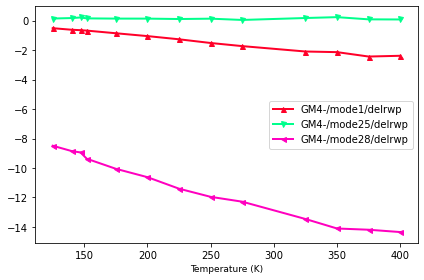

In [11]:
scf3.plot(['GM4-/mode1/delrwp', 'GM4-/mode25/delrwp', 'GM4-/mode28/delrwp'])

This could also be plotted using a for loop, which could save time if you were not using the unique_modes parameter (the number of modes would triple to 9)

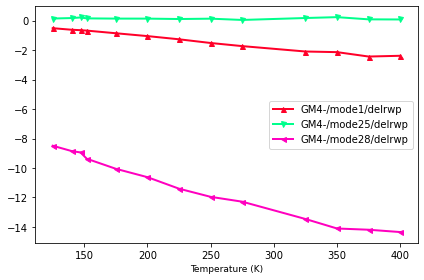

In [12]:
modes = list(scf3.hdf['GM4-'].keys())
plot_list = []
for mode in modes:
    plot_list.append(f'GM4-/{mode}/delrwp')
scf3.plot(plot_list)

We can plot all delrwps with a different function;

In [13]:
scf3.plot_singlemode()

The figure here gets saved to the working directory. The legend gets saved separately as it is quite large.

We can use plot function to take a closer look at some modes:

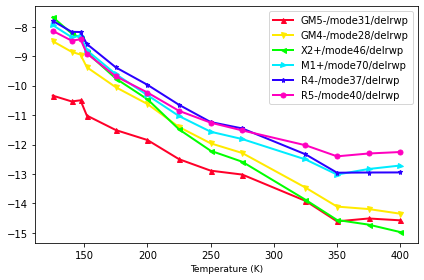

In [19]:
scf3.plot(['GM5-/mode31/delrwp', 'GM4-/mode28/delrwp', 'X2+/mode46/delrwp', 'M1+/mode70/delrwp', 'R4-/mode37/delrwp', 
           'R5-/mode40/delrwp'])#, 'X1+/mode43/delrwp', 'X5+/mode55/delrwp', 'X5-/mode64/delrwp', 'M5+/mode82/delrwp'])

Since the single mode version of SAPA is comparitively quick to operate, it is easier to see changes e.g. with respect to refinement radius. Using the previous tutorial, re-run with different finishx values (and change sample to something to denote the new finish_x value. e.g. ScF3_20 for finishx = 20). For simplicitys sake, change these in the write_inp() function, then choose Kernel -> Restart and Run-All. The below code plots the same modes as above for finishx = 20

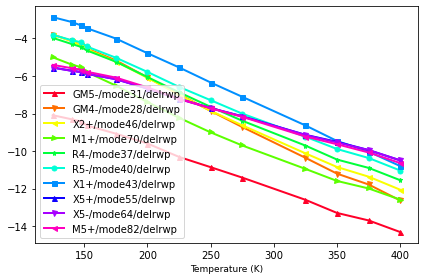

In [20]:
new_sample = 'ScF3_20'
scf3_new = su.sapa_utils_hdf('ScF3_iso.cif', f'{new_sample}_singlemode.hdf5')
scf3_new.plot_singlemode()
scf3_new.plot(['GM5-/mode31/delrwp', 'GM4-/mode28/delrwp', 'X2+/mode46/delrwp', 'M1+/mode70/delrwp', 'R4-/mode37/delrwp', 
           'R5-/mode40/delrwp', 'X1+/mode43/delrwp', 'X5+/mode55/delrwp', 'X5-/mode64/delrwp', 'M5+/mode82/delrwp'])


If you investigate these modes using ISOVIZ, you will find that most of them are a "semi-rigid" type mode - they distort bond angles in the ScF6 octahedra, but not bond lengths. A lot of these modes look very similar, but with different propogation vectors -> this indicates they are the same mode but at different k-points, i.e they are on the same line in the dispersion curve.

R5- is a rigid unit mode, with each of the 3 modes associated with the irrep being an out-of-phase octahedral tilt. This mode has a large negative Gruneisen parameter and is low in energy, so is commonly thought of as the driving force of the negative thermal expansion property of ScF3. The overall thermal expansion coefficient is formed from a contribution of all modes, weighted with inverse proportionality to their energy. R5-, and the other rigid unit modes, only exist on one line, so their contribution is typically drowned out by the positive gruneisen parameters of other modes, hence why typically the standard ABX3 perovskites do not exhibit NTE.

These semi-rigid unit modes have small negative Gruneisen parameters, and in ScF3 are low enough in energy that they bring the sign of thermal expansion negative. This can happen in ScF3 because the lack of an A-site compared to ABO3 perovskites, and the 1- charge of F compared to the typical 2- charge on the O, means the coulomb repulsion force between F ions bonded to the same Sc is lowered.  